<a href="https://colab.research.google.com/github/faisalfaturohman/Mall-Customer-Segmentation-Using-Clustering/blob/main/Mall_Customer_Segmentation_Using_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library Python Yang Akan Digunakan**

In [125]:
# Import Library
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [126]:
df_mall=pd.read_csv('https://raw.githubusercontent.com/faisalfaturohman/Mall-Customer-Segmentation-Using-Clustering/main/Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset yang digunakan merupakan data pelanggan Mall berdasarkan pendapatan (Annual Income), Skor Pengeluaran (Spending Score), Umur (Age), Jenis Kelamin (Gender), dan Customer ID.


> 


Data tersebut dapat digunakan untuk melakukan segmentasi pada data. 

## **Eksplorasi Dataset**

In [127]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [128]:
# Prints Descriptive Statistics
df_mall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Dari data diatas didapatkan keterangan dengan rata-rata umur pelanggan adalah 38,85 tahun, pendapatan rata-rata 60,56 k$ dan rata-rata spending score pelanggan adalah 50,20

Melakukan perubahan nama agar lebih mudah ketika memanggil variabel

In [129]:
df_mall.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df_mall.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Visualisasi Data**

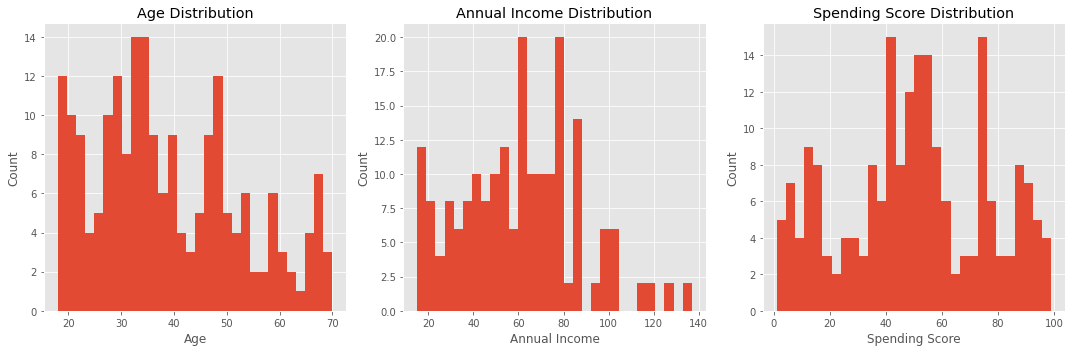

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1,)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(df_mall.Age,bins=30)

plt.subplot(1,3,2)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.hist(df_mall['Income'],bins=30)

plt.subplot(1,3,3)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.hist(df_mall['Score'],bins=30)

plt.tight_layout()

pass

Berdasarkan histogram yang ada kita bisa mengobservasi jika kebanyakan pelanggar berumur 30-40 tahun, pendapatan pelanggan kebanyakan antara 60-80 dan spending score kebanyakan antara 40-60.

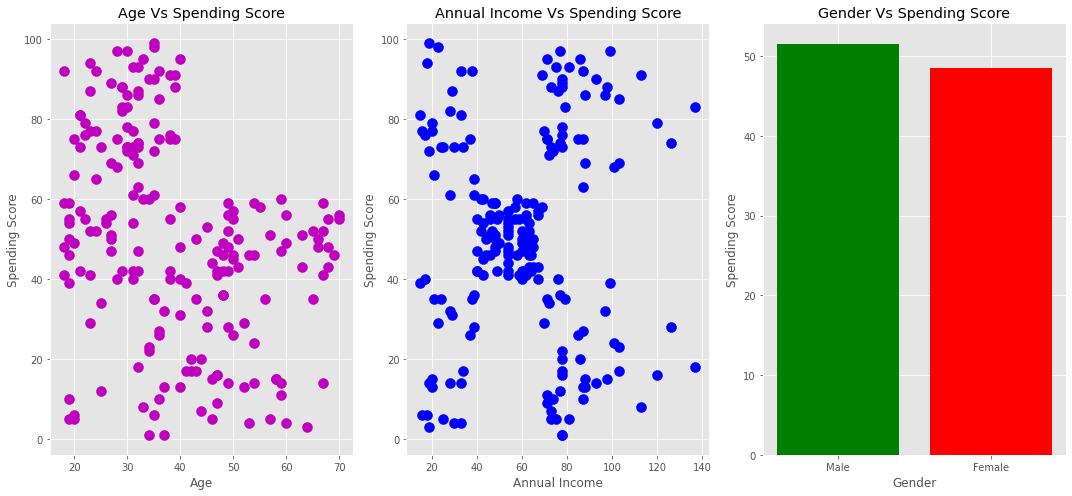

In [131]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1,)
plt.title('Age Vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(df_mall['Age'],df_mall['Score'],s=100,c='m')

plt.subplot(1,3,2)
plt.title('Annual Income Vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(df_mall['Income'],df_mall['Score'],s=100,c='b')

colors = ['g','r','m','b']

plt.subplot(1,3,3,)
plt.title('Gender Vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
cat_list=df_mall['Gender'].unique()
cat_average=df_mall.groupby('Gender').mean()['Score']
plt.bar(cat_list,cat_average,color=colors)

plt.tight_layout()

pass

Dari plot diatas didapatkan kesimpulan :
1.   jika pada umur 20 - 40 tahun akan melakukan spending lebih banyak dibandingkan setelah umur 40 tahun, hal itu disebabkan karena pada umur 40 tahun keatas uang pendapatan akan lebih digunakan untuk keperluan keluarga bagi yang sudah berkeluarga.
2.   Dengan menggunakan Annual Income saja sudah memperlihatkan kurang lebihnya kelompok data / cluster.
3.   Dengan menggunakan perbandingan Gender dengan Spending score kita dapat melihat jika pria lebih banyak spend uang dibandingkan wanita.

# **K-Means Clustering**

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

## **Segmentasi Data Menggunakan Income Vs Spending Score**

**Mencari n paling optimum menggunakan Metode Elbow**

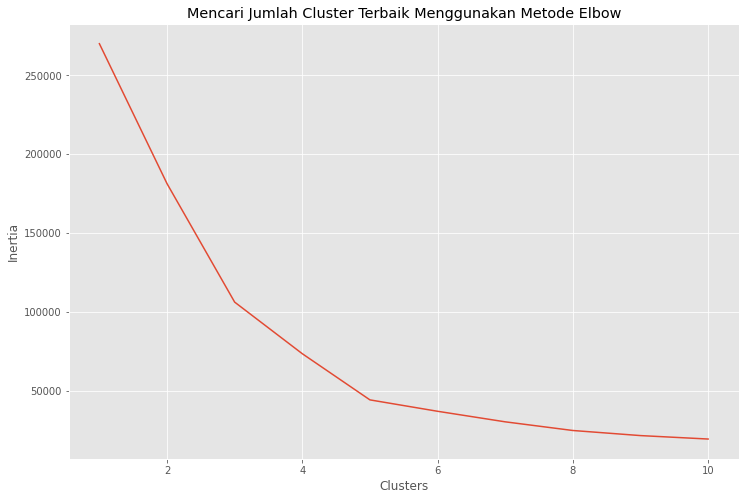

In [132]:
X = df_mall.iloc[:,[3,4]].values

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Jumlah Cluster Terbaik Menggunakan Metode Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

Didapatkan 5 Cluster

**Penerapan Metode K-Means**

In [133]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

**Visualisasi Data Hasil Clustering menggunakan K-Means**

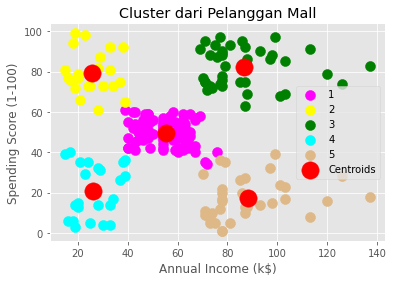

In [134]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster dari Pelanggan Mall')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show
pass

Berdasarkan perbandingan antara income dan spending menggunakan algoritma K-Means didapatkan ada 5 cluster :
1.   Cluster 1, Pendapatan(Income) Sedang Spending sedang = Standar 
2.   Cluster 2, Pendapatan(Income) Rendah Spending Tinggi = Boros
3.   Cluster 3, Pendapatan(Income) Tinggi Spending Tinggi = Dapat menjadi Target Mall yang paling optimal
4.   Cluster 4, Pendapatan(Income) Rendah Spending Rendah = Bijaksana 
5.   Cluster 5, Pendapatan(Income) Tinggi Spending Rendah = Hemat dan berhati-hati 


## **Segmentasi Data Menggunakan Age Vs Spending Score**

**Mencari n paling optimum menggunakan Metode Elbow**

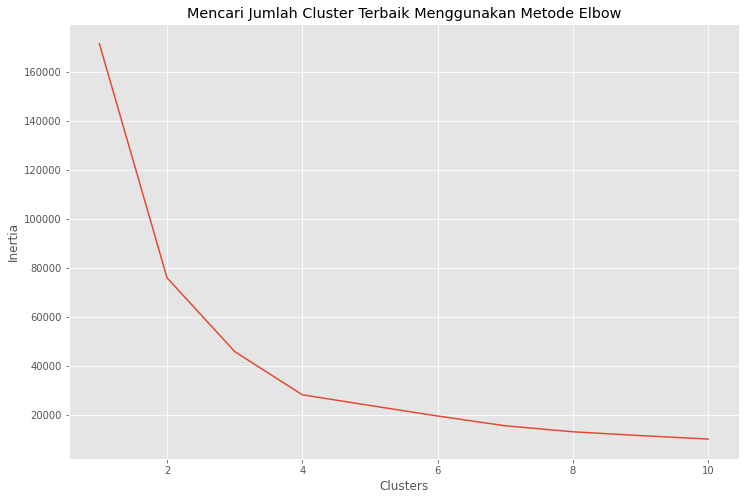

In [135]:
# Memilih variabel yang ingin digunakan yaitu Age dan spending yang berada pada kolom 2 dan
X1=df_mall.iloc[:,[2,4]].values

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X1)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Jumlah Cluster Terbaik Menggunakan Metode Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

**Penerapan Metode K-Means**

In [136]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X1)

**Visualisasi Data Hasil Clustering menggunakan K-Means**

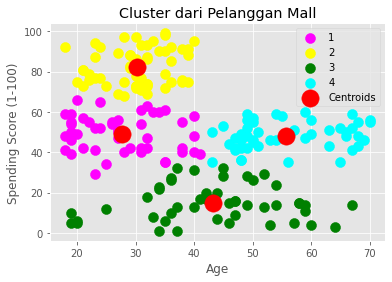

In [137]:
plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='magenta',label='1')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='yellow',label='2')
plt.scatter(X1[y_kmeans==2,0],X1[y_kmeans==2,1],s=100,c='green',label='3')
plt.scatter(X1[y_kmeans==3,0],X1[y_kmeans==3,1],s=100,c='cyan',label='4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster dari Pelanggan Mall')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show
pass

Dari data diatas disimpulkan ada 4 kelompok :
1.   Cluster 1 = Muda dan Spending Sedang
2.   Cluster 2 = Muda dan Spending Tinggi
3.   Cluster 3 = Pelanggan dengan berbagai umur dengan rating Spending Rendah
4.   Cluster 4 = Pelanggan Orang Tua dengan Spending Sedang



## **Hubungan Antara Age (Umur) dengan Income (Pendapatan)**

**Mencari n paling optimum menggunakan Metode Elbow**

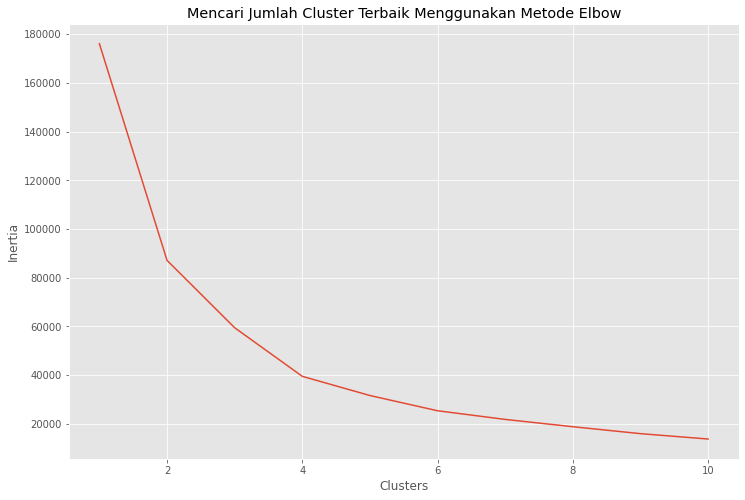

In [138]:
# Memilih variabel yang ingin digunakan yaitu Age dan spending yang berada pada kolom 2 dan
X2=df_mall.iloc[:,[2,3]].values

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X2)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Jumlah Cluster Terbaik Menggunakan Metode Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [139]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X2, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.42620850066216065
For n_clusters=3, The Silhouette Coefficient is 0.4254725038202792
For n_clusters=4, The Silhouette Coefficient is 0.43368606798330267
For n_clusters=5, The Silhouette Coefficient is 0.40157587536205724
For n_clusters=6, The Silhouette Coefficient is 0.3959805131239844
For n_clusters=7, The Silhouette Coefficient is 0.3855106798224098
For n_clusters=8, The Silhouette Coefficient is 0.3752592697888692
For n_clusters=9, The Silhouette Coefficient is 0.3983502229830414
For n_clusters=10, The Silhouette Coefficient is 0.4090738019062472


**Penerapan Metode K-Means**

In [140]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X2)

**Visualisasi Data Hasil Clustering menggunakan K-Means**

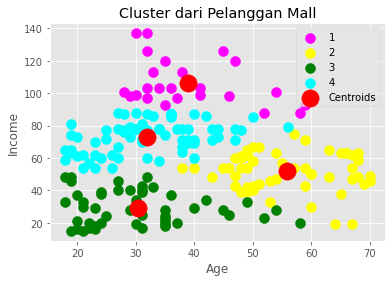

In [141]:
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='magenta',label='1')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='yellow',label='2')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=100,c='green',label='3')
plt.scatter(X2[y_kmeans==3,0],X2[y_kmeans==3,1],s=100,c='cyan',label='4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster dari Pelanggan Mall')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show
pass

Didapatkan kesimpulan jika pada umur 30 - 40 merupakan pelanggan dengan Income(pendapatan) tertinggi.

## **Hubungan Antara Age, Income dan Spending Score**

**Mencari Nilai K Paling Optimal**

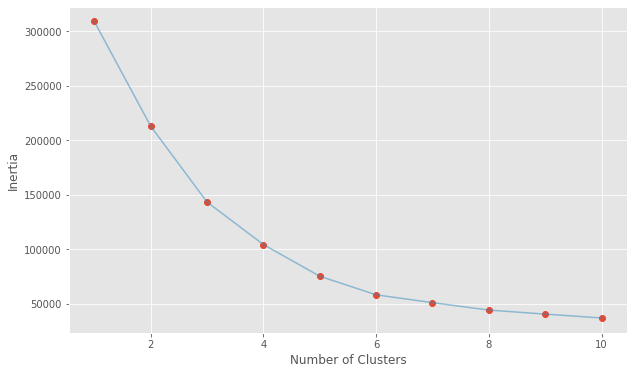

In [142]:
# Memilih variabel yang ingin digunakan yaitu Age, Income, Spending Score
X3 = df_mall[['Age' , 'Income' ,'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Penerapan Metode K-Means**

In [143]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [144]:
# save file to consistency of cluster point
df_mall.to_csv('customer segmented.csv', index=False)

# read to interpret
df_mall = pd.read_csv('customer segmented.csv')

**Visualisasi Data Hasil Clustering menggunakan K-Means**

In [145]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)
df_mall['label3'] =  labels3

trace1 = go.Scatter3d(
    x= df_mall['Age'],
    y= df_mall['Score'],
    z= df_mall['Income'],
    mode='markers',
     marker=dict(
        color = df_mall['label3'], 
        size= 20,
        line=dict(
            color= df_mall['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()